<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0
The entropy model's score: 0.925
The gini model's score: 0.925
The logistic model's score: 0.8607142857142858
The Naive Bayes model's score: 0.8857142857142857


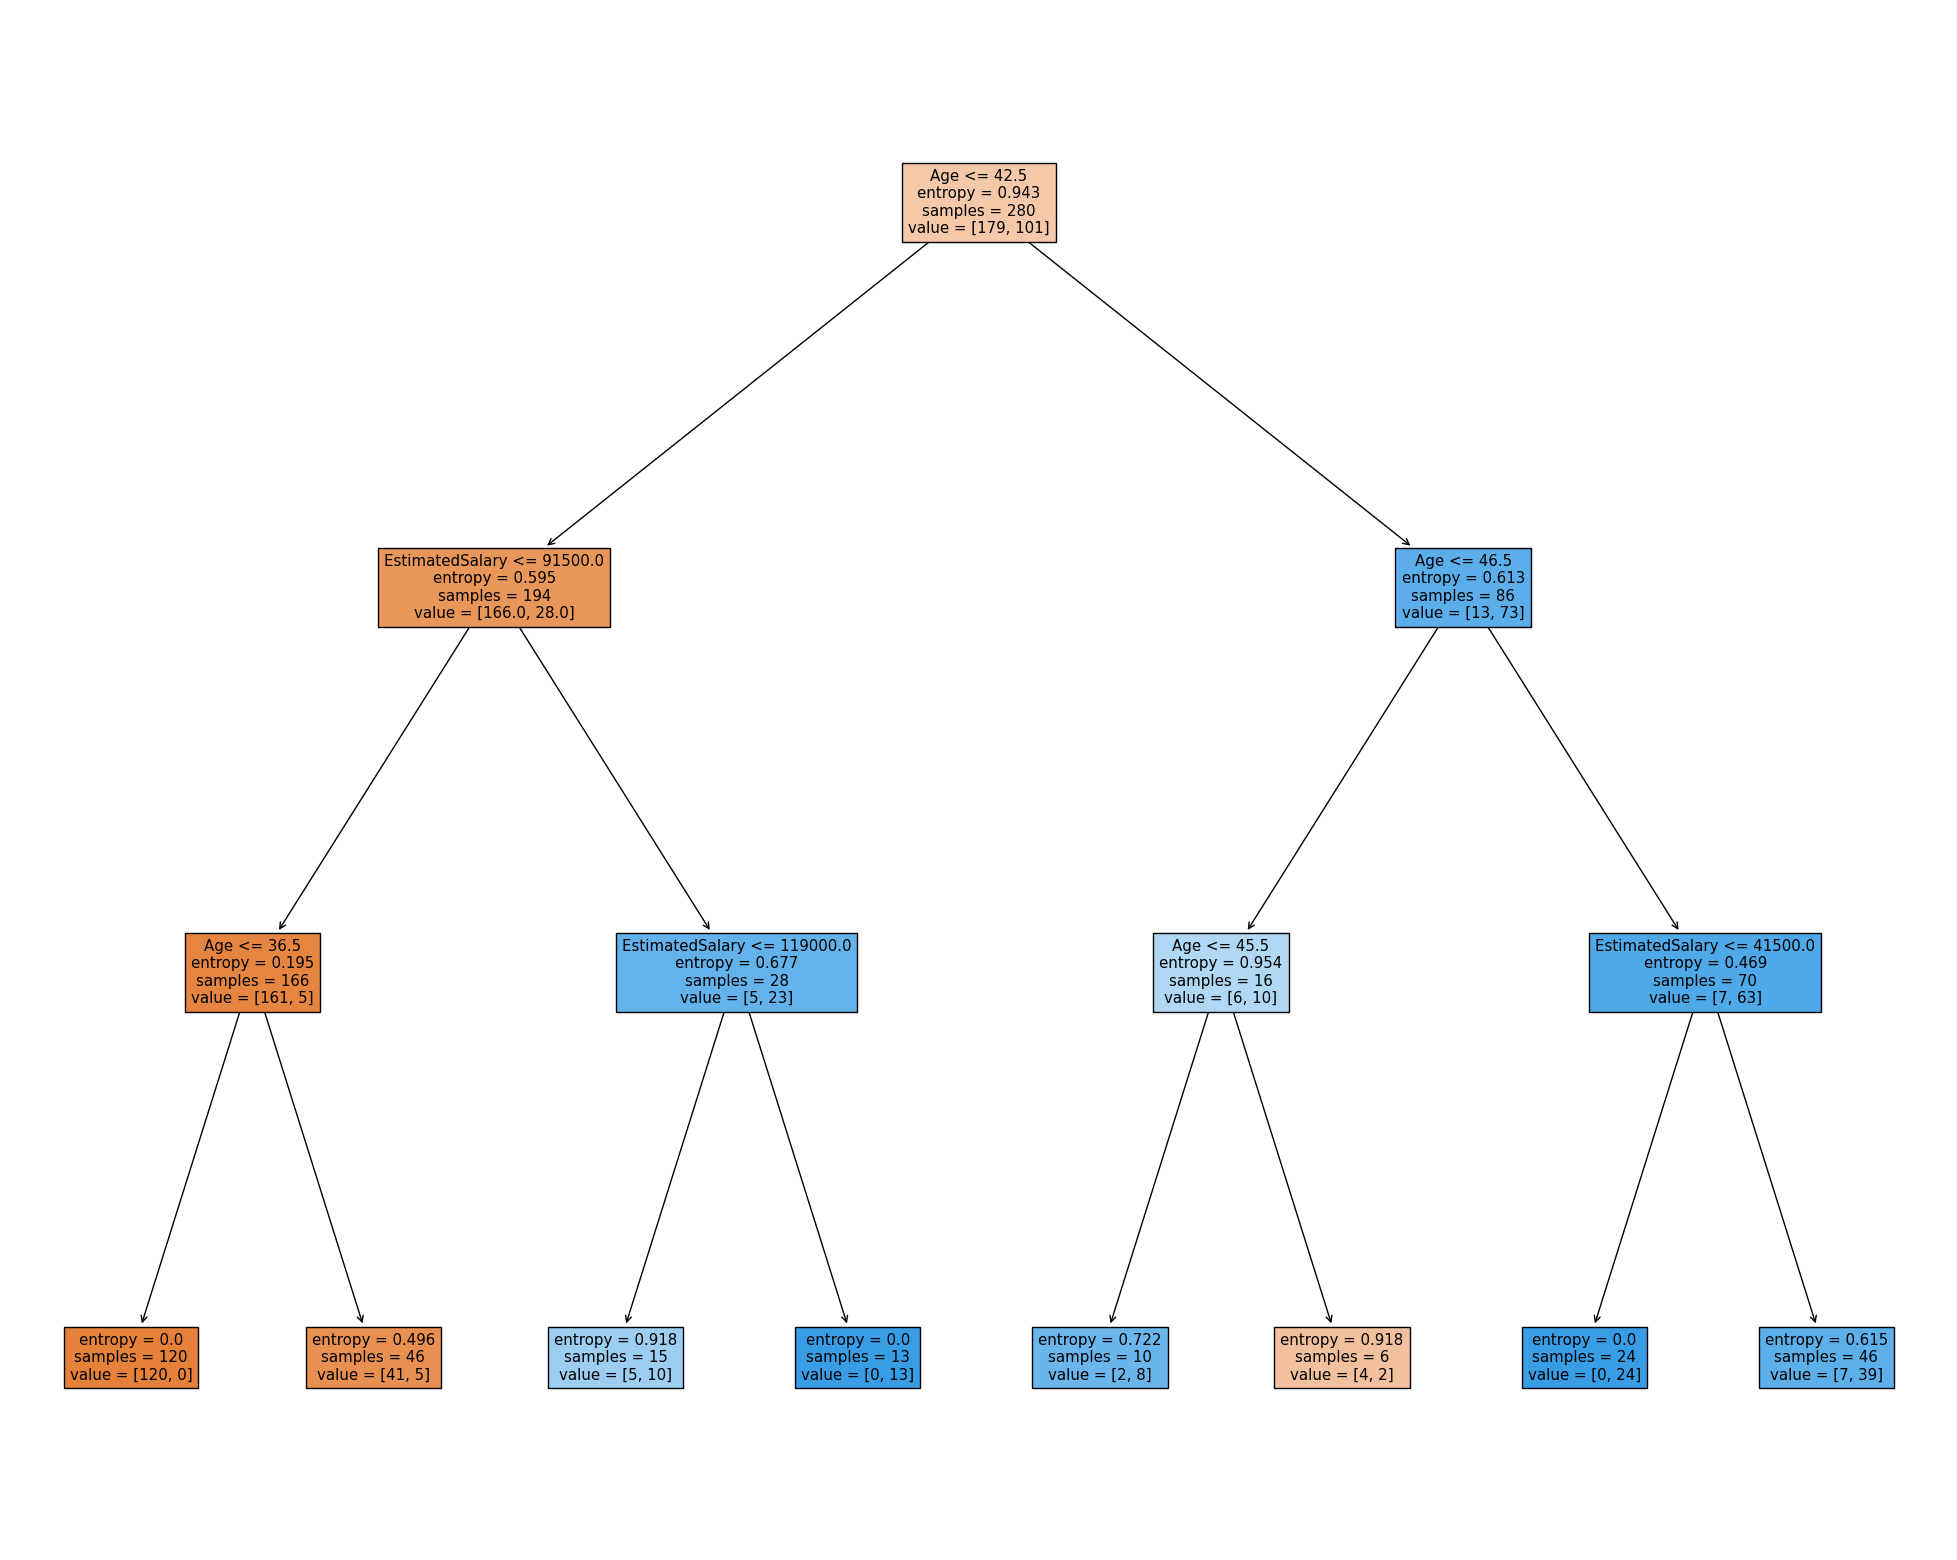

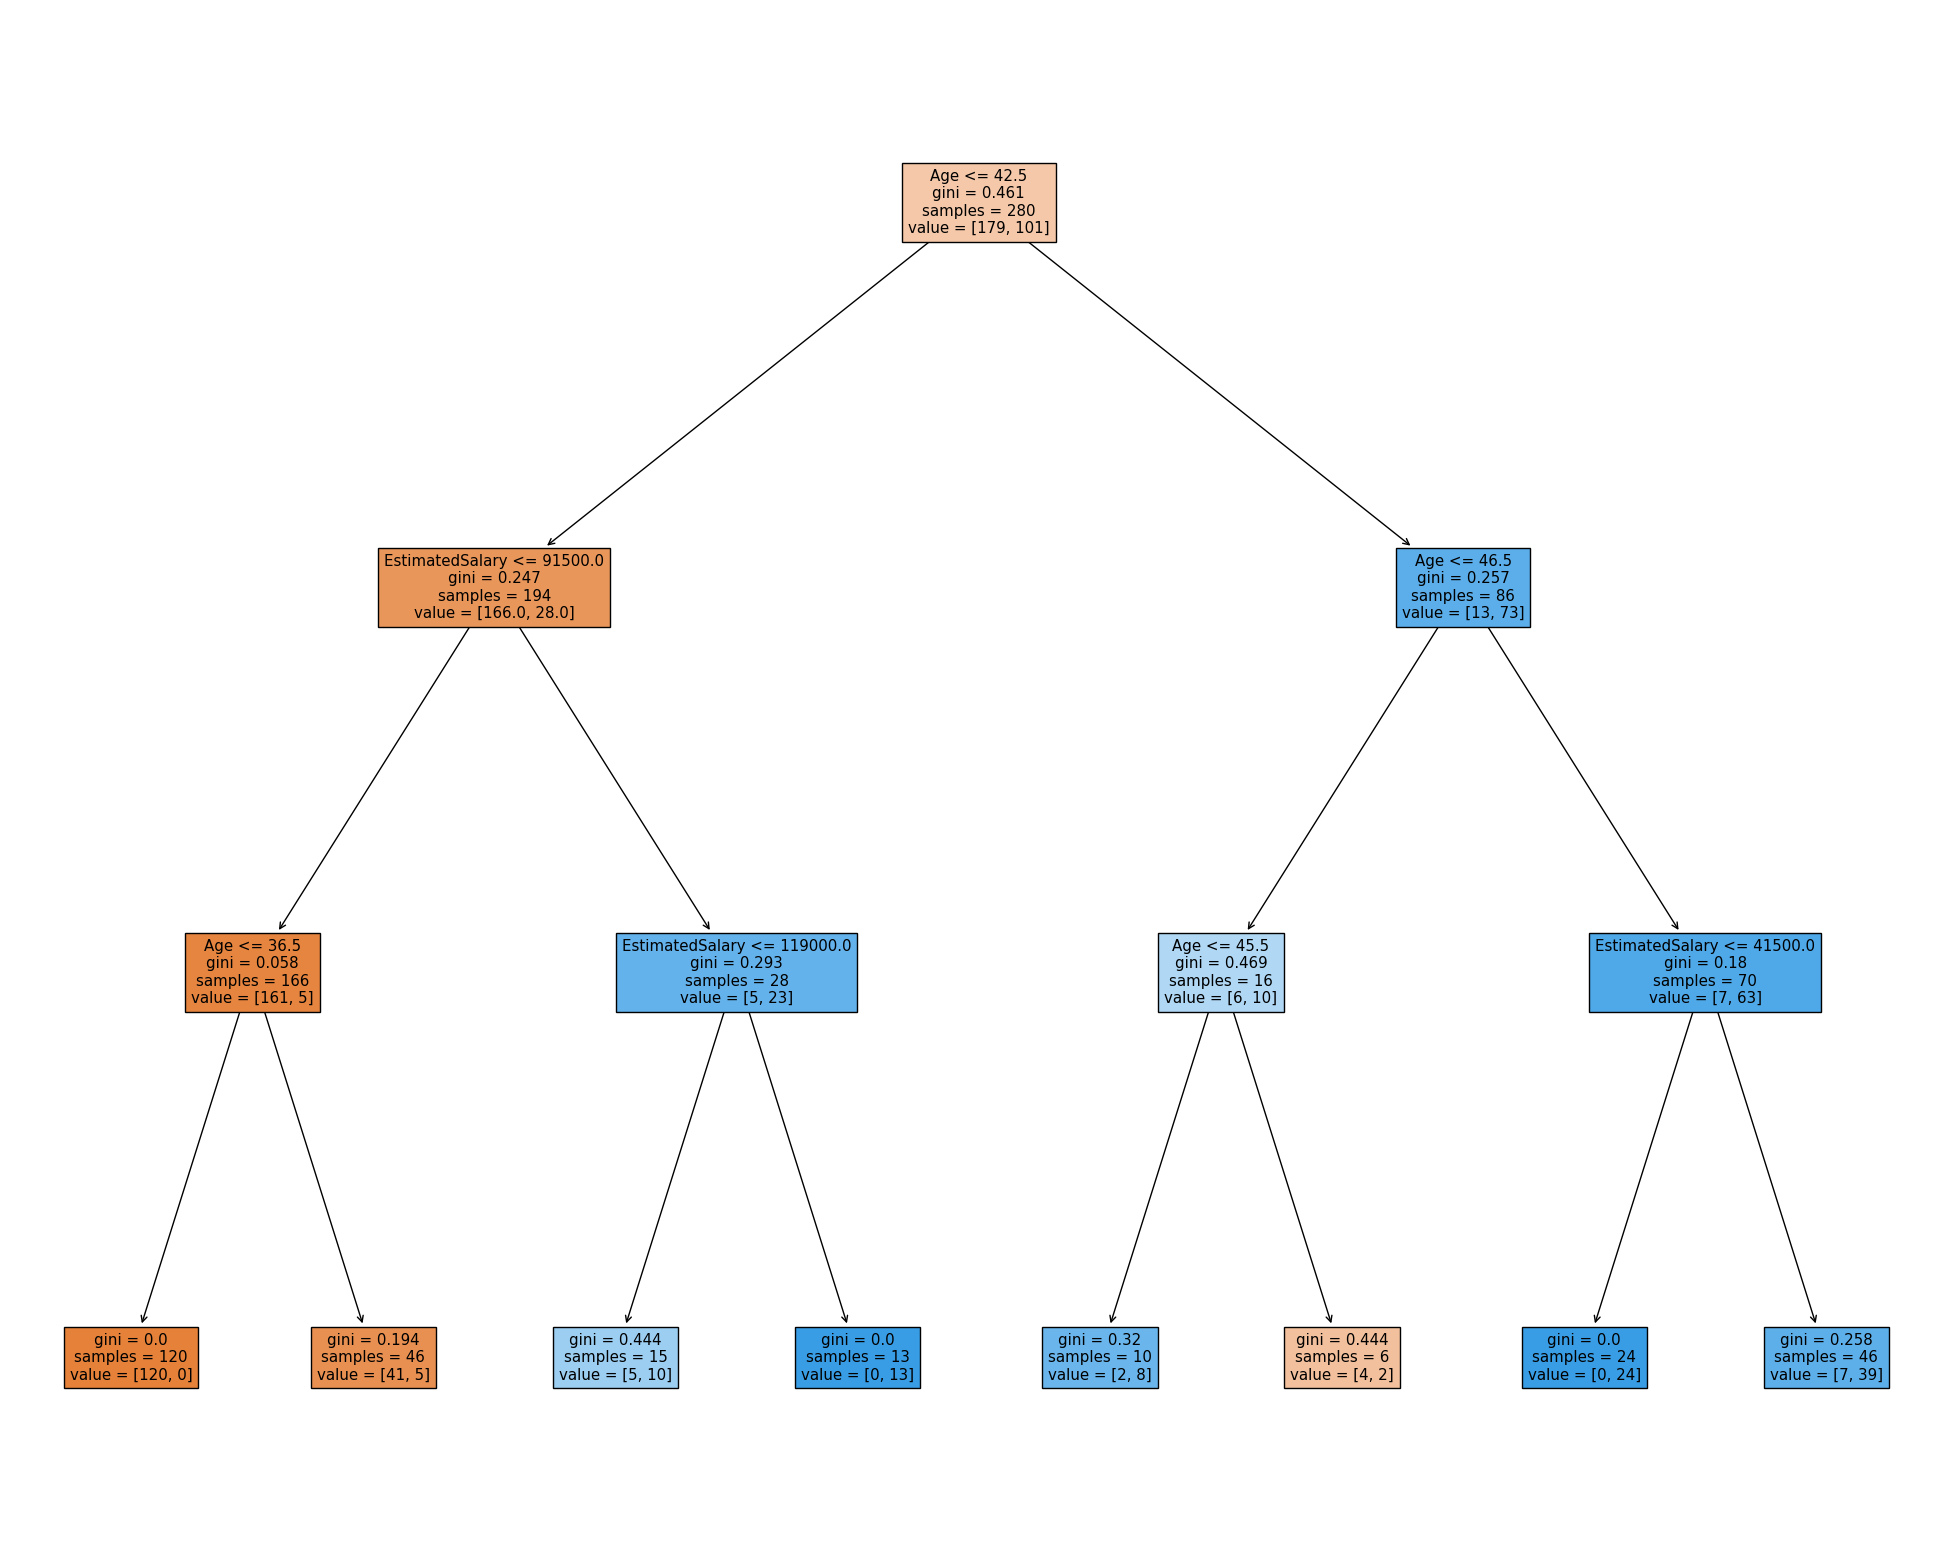

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("Social_Network_Ads.csv")

print(data.info())

data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

print(data.head())

classes = data.drop('Purchased', axis='columns')
target = data['Purchased']

x_train, x_test, y_train, y_test = train_test_split(classes, target, test_size=0.3)

model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model1.fit(x_train, y_train)
entropy_score = model1.score(x_train, y_train)
print(f"The entropy model's score: {entropy_score}")

model2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model2.fit(x_train, y_train)
gini_score = model2.score(x_train, y_train)
print(f"The gini model's score: {gini_score}")

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
log_score = logistic_model.score(x_train, y_train)
print(f"The logistic model's score: {log_score}")

gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_score = gnb.score(x_train, y_train)
print(f"The Naive Bayes model's score: {gnb_score}")

from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model1, feature_names=x_train.columns, filled=True)

fig = plt.figure(figsize=(25,20))  
_ = tree.plot_tree(model2, feature_names=x_train.columns, filled=True)

The KNN model's score: 0.9285714285714286


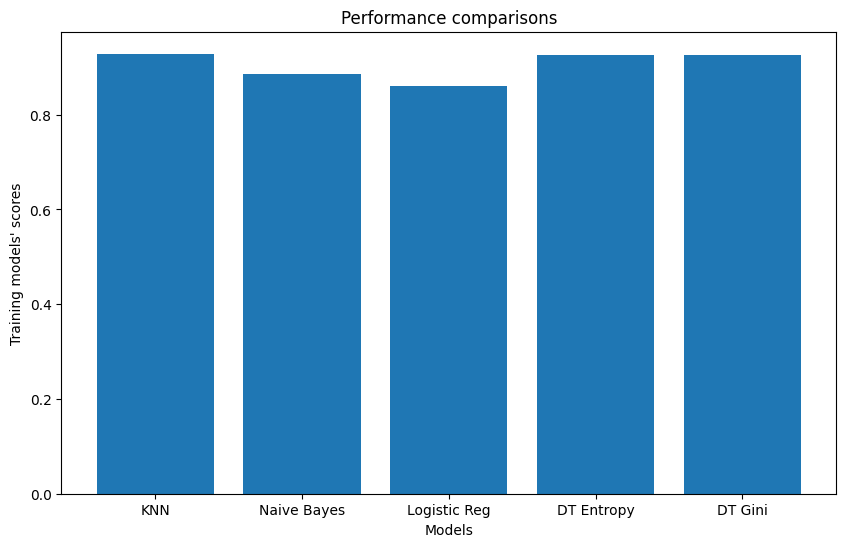

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import math

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

knn_model = KNeighborsClassifier(n_neighbors=math.floor(math.sqrt(len(y_test)))-1, p=2, metric='euclidean')
knn_model.fit(x_train, y_train)
print(f"The KNN model's score: {knn_model.score(x_train, y_train)}")

models = ['KNN', 'Naive Bayes', 'Logistic Reg', 'DT Entropy', 'DT Gini']
scores = [knn_model.score(x_train, y_train), gnb_score, log_score,
          entropy_score, gini_score]

plt.figure(figsize=(10, 6))
plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Training models\' scores')
plt.title('Performance comparisons')
plt.show()

According to the models' scores, we can conclude the following:
- Gini's model slightly outperformed the rest of the models.
- Followed by Entropy's.
- Then KNN's.
- Next, Naive Bayes's.
- Lastly, logistic regression's.